# Support Vector machine

In [8]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from matplotlib import pyplot as plt

In [9]:
from io import StringIO
dataset =StringIO('''
a,b,o
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
1,0,0
2,1,0
3,2,0
4,1.5,0
5,4,0
1,4,1
1,5,1
1,6,1
1,3.5,1
1,4.5,1
2,4,1
2,5,1
1.5,4,1
1.5,4.5,1
1,6,1
1,6,1
1,6,1
1,6,1
1,6,1
''')
df = pd.read_csv(dataset)

In [10]:
classifier = SVC(kernel='linear')

In [11]:
model = classifier.fit(df[['a', 'b']], df['o'])

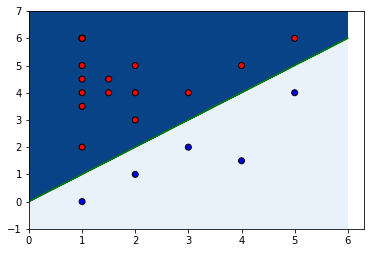

In [12]:
x_min, x_max = df.iloc[:, 0].min() - 1, df.iloc[:, 0].max() + 1
y_min, y_max = df.iloc[:, 1].min() - 1, df.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),
                     np.arange(y_min, y_max, .01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}
colors = [color_map[y] for y in df['o']]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)

plt.plot([0, 6], [0,6], color='g')
plt.scatter(df.iloc[:, 0],df.iloc[:, 1], c=colors, edgecolors='black')
# plt.axis('off')